# A neural network that you can watch while it "learns" a curve

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import math

Create noisy data based on an actual curve

In [2]:
# orig is -10,10,num=1000
x_data = np.linspace(-10, 10, num=1000)
y_data = (0.1*x_data*x_data) + (10 * np.cos(x_data)) - (2.5*x_data) + 0.2*np.random.normal(size=1000)
#y_data = 3* x_data * np.tanh(x_data) + 1.5*np.random.normal(size=600)
math2eng = '0.1x^2 * 10cos(x) - 2.5x'

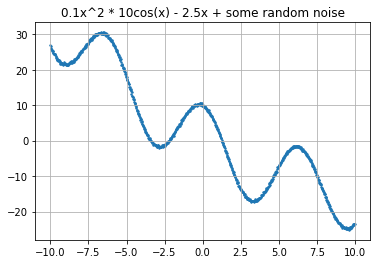

In [7]:
# Display the dataset and save to file
plt.scatter(x_data[::1], y_data[::1], s=2)
plt.title('{} + some random noise'.format(math2eng))
plt.grid()
plt.show()
#plt.savefig('dataset.png',dpi=300) 

In [4]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

In [5]:
# Display the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 0s 1ms/step - loss: 47.5918


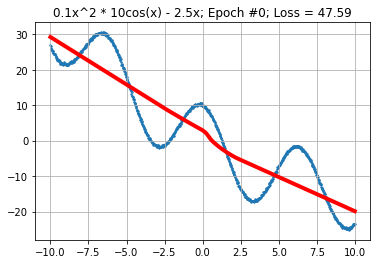

32/32 [==============================] - 0s 1ms/step - loss: 47.1990


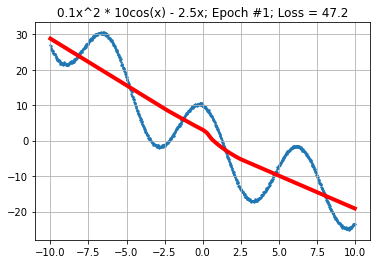

32/32 [==============================] - 0s 1ms/step - loss: 47.2064


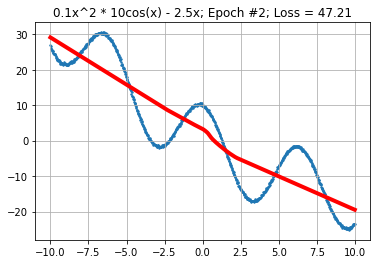

32/32 [==============================] - 0s 2ms/step - loss: 47.0317


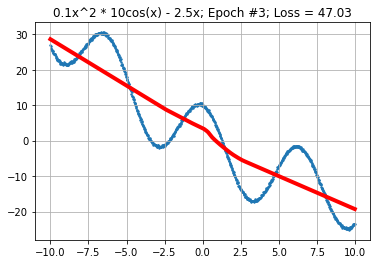

32/32 [==============================] - 0s 1ms/step - loss: 46.6338


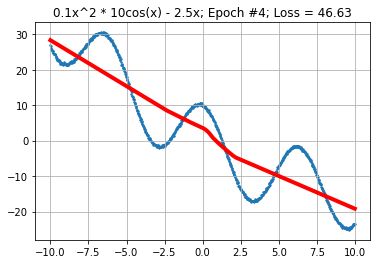

32/32 [==============================] - 0s 1ms/step - loss: 46.5029


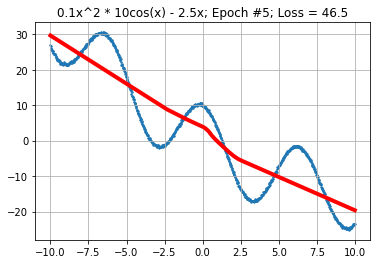

32/32 [==============================] - 0s 1ms/step - loss: 46.0928


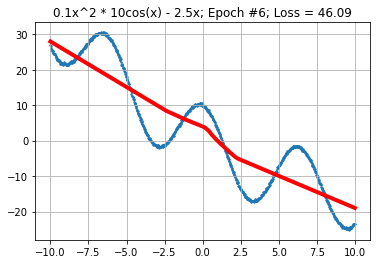

32/32 [==============================] - 0s 2ms/step - loss: 45.9191


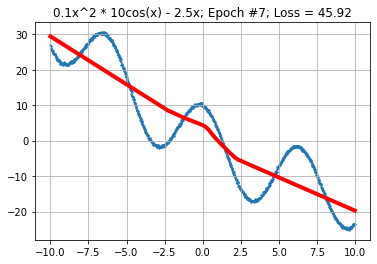

32/32 [==============================] - 0s 1ms/step - loss: 45.3545


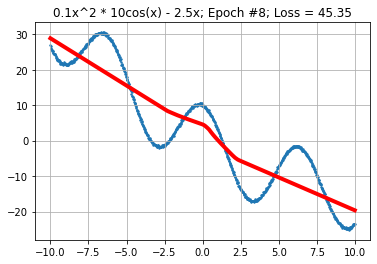

32/32 [==============================] - 0s 1ms/step - loss: 45.1216


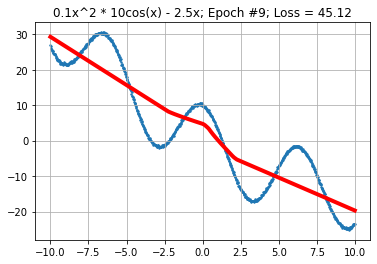

32/32 [==============================] - 0s 2ms/step - loss: 44.6830


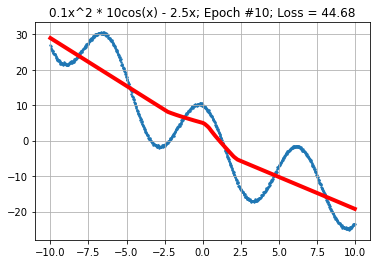

32/32 [==============================] - 0s 2ms/step - loss: 44.4530


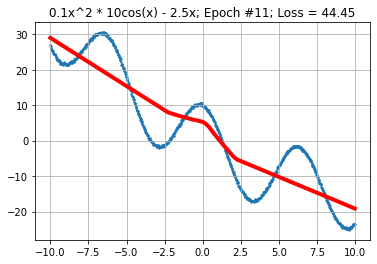

32/32 [==============================] - 0s 2ms/step - loss: 44.0331


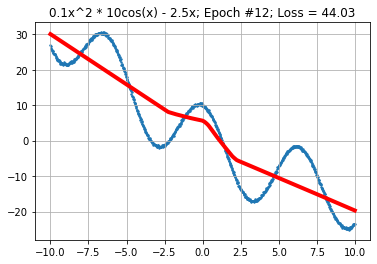

32/32 [==============================] - 0s 1ms/step - loss: 43.7564


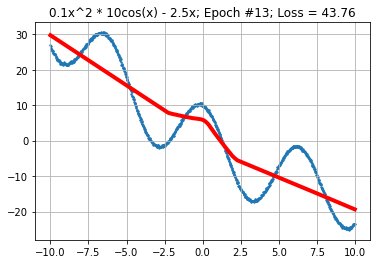

32/32 [==============================] - 0s 1ms/step - loss: 43.2404


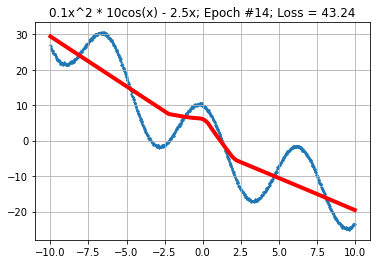

32/32 [==============================] - 0s 1ms/step - loss: 42.9729


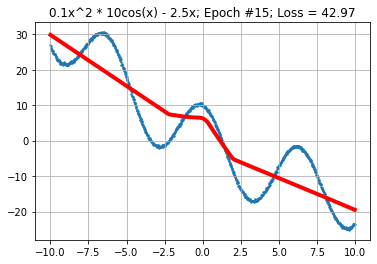

32/32 [==============================] - 0s 2ms/step - loss: 42.8343


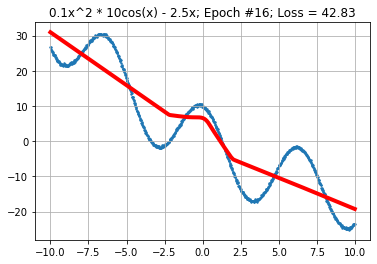

32/32 [==============================] - 0s 1ms/step - loss: 42.4383


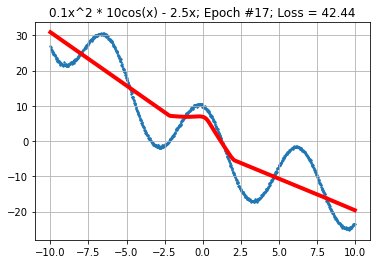

32/32 [==============================] - 0s 2ms/step - loss: 41.8592


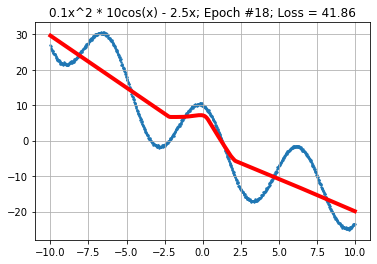

32/32 [==============================] - 0s 1ms/step - loss: 41.3657


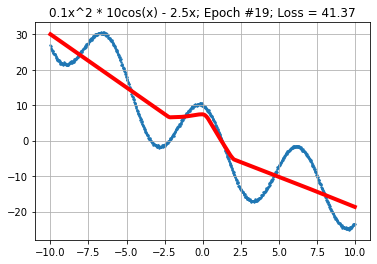

32/32 [==============================] - 0s 2ms/step - loss: 41.3080


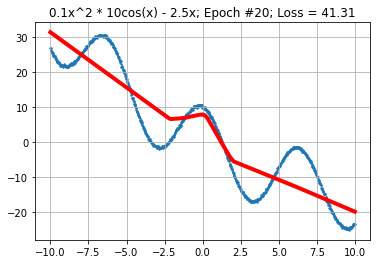

32/32 [==============================] - 0s 1ms/step - loss: 40.5149


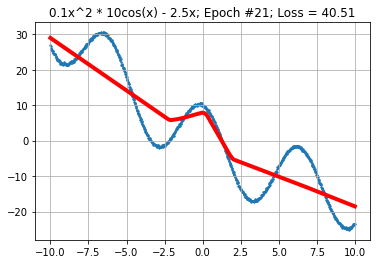

32/32 [==============================] - 0s 2ms/step - loss: 40.7361


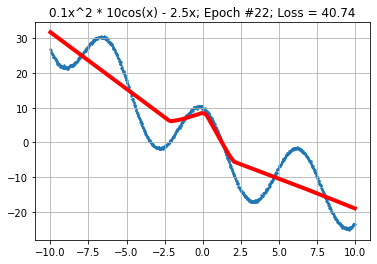

32/32 [==============================] - 0s 1ms/step - loss: 40.0709


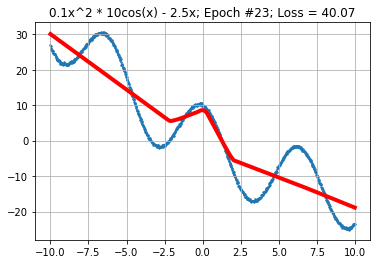

32/32 [==============================] - 0s 2ms/step - loss: 39.6799


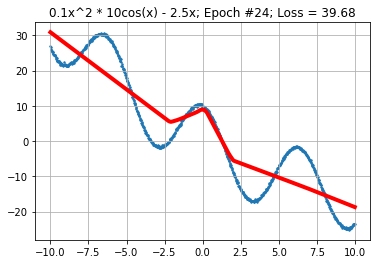

32/32 [==============================] - 0s 2ms/step - loss: 39.5138


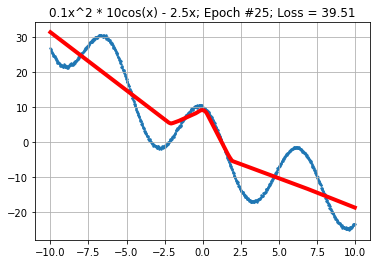

32/32 [==============================] - 0s 2ms/step - loss: 39.1568


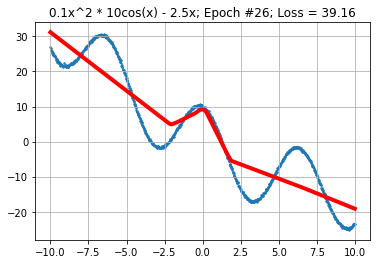

32/32 [==============================] - 0s 2ms/step - loss: 38.9763


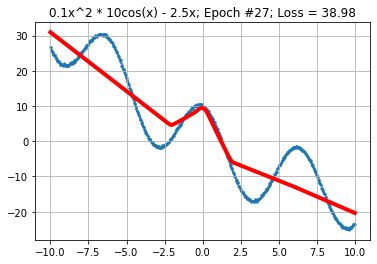

32/32 [==============================] - 0s 2ms/step - loss: 38.9111


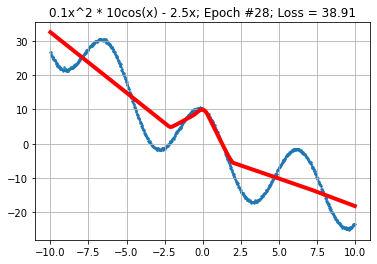

32/32 [==============================] - 0s 2ms/step - loss: 38.5621


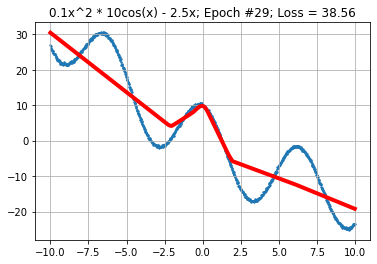

<Figure size 432x288 with 0 Axes>

In [9]:
# change the number in range(30) to increase the number of epochs
for x in range(30):
    # One epoch at a time
    history = model.fit( x_data, y_data, epochs=1, verbose=1)
    loss = round(float(*history.history['loss']),2)
  
    # Compute the output 
    y_predicted = model.predict(x_data)
  
    # Display the result
    plt.scatter(x_data[::1], y_data[::1], s=2)
    plt.plot(x_data, y_predicted, 'r', linewidth=4)
    plt.title('{}; Epoch #{}; Loss = {}'.format(math2eng, x, loss))
    plt.grid()
    plt.show()
    #plt.savefig('training-epoch-' + str(x) +'.png',dpi=300) 
    plt.clf()
  
    filename = '_1x^2+10cosx-2_5x-E{}.txt'.format(x)


    with open(filename,'w') as myfile:  
        for layerNum, layer in enumerate(model.layers):
            weights = layer.get_weights()[0]
            biases = layer.get_weights()[1]
            
            for toNeuronNum, bias in enumerate(biases):
                 myfile.write(f'{layerNum}Bias -> Layer{layerNum+1}Neuron{toNeuronNum}: {bias}')
                 myfile.write('\n')
                 
            myfile.write('\n')
                 
            for fromNeuronNum, wgt in enumerate(weights):
                myfile.write('\n')
                for toNeuronNum, wgt2 in enumerate(wgt):
                    myfile.write(f'Layer{layerNum}Neuron{fromNeuronNum} -> Layer{layerNum+1}Neuron{toNeuronNum} = {wgt2}')
                    myfile.write('\n')
            
            myfile.write('\n')
                    

